# Introdução

Este notebook foi feito por Gabriel Matz visando o estudo dirigido para a prova de certificação oficial para o Tensorflow. A descrição da prova está no seguinte link:
https://www.tensorflow.org/certificate?hl=pt-br.

Utilizei como base os seguintes notebooks(além de sites variados e stack overflow para pequenas consultas):

1- https://github.com/mrdbourke/tensorflow-deep-learning

2-https://github.com/williamcwi/DeepLearning.AI-TensorFlow-Developer-Professional-Certificate

O conteúdo deste segundo notebook engloba a segunda parte de exigências da prova do Tensorflow, que estão descritas abaixo:

"(2) Construção e treinamento de modelos de redes neurais usando o TensorFlow 2.x

Você precisa compreender os princípios fundamentais de aprendizado de máquina (ML) e deep learning (DL) utilizando o TensorFlow 2.x. Você precisa saber como:

❏ Utilizar o TensorFlow 2.x.

❏ Construir, compilar e treinar modelos de aprendizado de máquina (ML) usando o TensorFlow.

❏ Pré-processar dados para prepará-los para uso em um modelo.

❏ Utilizar modelos para prever resultados.

❏ Construir modelos sequenciais com múltiplas camadas.

❏ Construir e treinar modelos para classificação binária.

❏ Construir e treinar modelos para categorização multi-classe.

❏ Plotar perda e precisão de um modelo treinado.

❏ Identificar estratégias para prevenir overfitting, incluindo aumento de dados e dropout.

❏ Utilizar modelos pré-treinados (transfer learning).

❏ Extrair características de modelos pré-treinados.

❏ Garantir que as entradas para um modelo estejam na forma correta.

❏ Garantir que você possa associar dados de teste à forma de entrada de uma rede neural.

❏ Garantir que você possa associar os dados de saída de uma rede neural à forma especificada para os dados de teste.

❏ Compreender o carregamento em lote (batch loading) de dados.

❏ Utilizar callbacks para acionar o fim dos ciclos de treinamento.

❏ Utilizar conjuntos de dados de diferentes fontes.

❏ Utilizar conjuntos de dados em diferentes formatos, incluindo json e csv.

❏ Utilizar conjuntos de dados da biblioteca tf.data.datasets."

# Desenvolvimento

In [ ]:
!nvidia-smi -L # checa se está usando gpu. Se estiver no collab, confira o ambiente de execução

GPU 0: Tesla T4 (UUID: GPU-0650c146-c608-032e-da0c-b29c001c3ae4)


**❏ Utilizar o TensorFlow 2.x.**

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


**❏ Utilizar conjuntos de dados de diferentes fontes.**



**❏ Construir e treinar modelos para classificação binária.**

Para o conteúdo abaixo foi utilizado os datasets da seguinte fonte:

Prever sobrevivência ou morte no titanic com base em seus dados pessoais:

https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text

In [ ]:
# Utilizando o zip disponível no link
import zipfile
import pandas as pd
# Unzip
zip_ref = zipfile.ZipFile("/content/archive.zip", "r")
zip_ref.extractall()
zip_ref.close()

**❏ Utilizar conjuntos de dados em diferentes formatos, incluindo json e csv.**

No geral, transformar csv e json em pandas ajuda, pela facilidade de vizualização e pela integração com o tensorflow.

In [ ]:
# O unzip transforma em um excel
data = pd.read_csv('/content/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.shape

(891, 12)

**❏ Pré-processar dados para prepará-los para uso em um modelo.**

Para este problema alguns passos de pré processamento são necessários.

1.   Retirar variáveis que são desnecessárias para a previsão
2.   One hot encode os categóricos
3.   Scaling de variáveis contínuas
4.   Separar em teste e treino o conjunto de dados
5.   Separar em inputs e labels
6.   Prefetching e mix precision para melhorar velocidade de execução


In [ ]:
# 1- Para retirar informações inúteis usamos o próprio pd
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# 2- Para fazer o one hot usamos o panda get_dummies. OneHotEncoder do sklearn também é excelente opção
# É necessário mudar o dtype de Sex porque está como objeto
data['Sex'] = data['Sex'].astype('category')
data['Sex'] = data['Sex'].cat.codes # One hot encoding
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
# Só precisamos encodar o embarked agora
pd.get_dummies(data['Embarked'])
for var in ['Embarked']:
  data = pd.concat([data,
                    pd.get_dummies(data[var], prefix=var)], axis=1)
  del data[var]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
# 3- Para o scaling usamos o sklearn
from sklearn.preprocessing import StandardScaler
continuo = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']

scaler = StandardScaler()

for var in continuo:
    data[var] = data[var].astype('float64')
    data[var] = scaler.fit_transform(data[var].values.reshape(-1, 1))
data= data.dropna() # Retirando linhas que tenham dados faltando(poderia também substituir pela média ou outras medidas)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827377,1,-0.530377,0.432793,-0.473674,-0.502445,0,0,1
1,1,-1.566107,0,0.571831,0.432793,-0.473674,0.786845,1,0,0
2,1,0.827377,0,-0.254825,-0.474545,-0.473674,-0.488854,0,0,1
3,1,-1.566107,0,0.365167,0.432793,-0.473674,0.420730,0,0,1
4,0,0.827377,1,0.365167,-0.474545,-0.473674,-0.486337,0,0,1


In [ ]:
# 4- Para dividir em teste e treino o sklearn tem essa função útil
from sklearn.model_selection import train_test_split
train, test= train_test_split(data, test_size=0.10, shuffle=True)
test.head(), train.head()

(     Survived    Pclass  Sex       Age     SibSp     Parch      Fare  \
 562         0 -0.369365    1 -0.117049 -0.474545 -0.473674 -0.376603   
 499         0  0.827377    1 -0.392601 -0.474545 -0.473674 -0.491456   
 860         0  0.827377    1  0.778495  1.340132 -0.473674 -0.364355   
 173         0  0.827377    1 -0.599265 -0.474545 -0.473674 -0.488854   
 775         0  0.827377    1 -0.805929 -0.474545 -0.473674 -0.492378   
 
      Embarked_C  Embarked_Q  Embarked_S  
 562           0           0           1  
 499           0           0           1  
 860           0           0           1  
 173           0           0           1  
 775           0           0           1  ,
      Survived    Pclass  Sex       Age     SibSp     Parch      Fare  \
 449         1 -1.566107    1  1.536263 -0.474545 -0.473674 -0.034314   
 244         0  0.827377    1  0.020727 -0.474545 -0.473674 -0.502949   
 530         1 -0.369365    0 -1.908136  0.432793  0.767630 -0.124920   
 553     

In [ ]:
test.shape, train.shape

((72, 10), (642, 10))

In [ ]:
# Separando em input e label
test_input= test.drop(['Survived'], axis=1)
test_label= test['Survived']
train_input= test.drop(['Survived'], axis=1)
train_label= test['Survived']

In [ ]:
test_input, test_label

(       Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_C  \
 562 -0.369365    1 -0.117049 -0.474545 -0.473674 -0.376603           0   
 499  0.827377    1 -0.392601 -0.474545 -0.473674 -0.491456           0   
 860  0.827377    1  0.778495  1.340132 -0.473674 -0.364355           0   
 173  0.827377    1 -0.599265 -0.474545 -0.473674 -0.488854           0   
 775  0.827377    1 -0.805929 -0.474545 -0.473674 -0.492378           0   
 ..        ...  ...       ...       ...       ...       ...         ...   
 789 -1.566107    1  1.122935 -0.474545 -0.473674  0.946246           1   
 586 -0.369365    1  1.191823 -0.474545 -0.473674 -0.346401           0   
 21  -0.369365    1  0.296279 -0.474545 -0.473674 -0.386671           0   
 16   0.827377    1 -1.908136  3.154809  0.767630 -0.061999           0   
 307 -1.566107    0 -0.874817  0.432793 -0.473674  1.544246           1   
 
      Embarked_Q  Embarked_S  
 562           0           1  
 499           0           1  
 860 

**❏ Garantir que as entradas para um modelo estejam na forma correta.**

**❏ Garantir que você possa associar os dados de saída de uma rede neural à forma especificada para os dados de teste.**

Erros de tamanho são absurdamente comuns no tensorflow. Tente sempre conferir constantemente os tamanhos de tensores que estiver usando, tanto de input quanto de saída.

In [ ]:
train_input.shape, train_label.shape

((72, 9), (72,))

**❏ Construir, compilar e treinar modelos de aprendizado de máquina (ML) usando o TensorFlow.**

Conforme código abaixo. Para esse notebook usarei somente uma rede neural feedforward. Caso queira entender o funcionamento teórico básico desse tipo de rede, recomendo a seguinte playlist:

https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=FGoLK0ZpkQpTDlzL


**❏ Compreender o carregamento em lote (batch loading) de dados.**


**❏ Construir modelos sequenciais com múltiplas camadas.**

Conforme código abaixo. Para esse notebook foi utilizado a API Sequential. Com a API Functional os resultados devem ser o mesmo.

In [ ]:
def novo_model_1(act='relu'):
    model = tf.keras.Sequential()
    tf.random.set_seed(1) # seed
    # camada de entrada
    model.add(tf.keras.Input(shape=(train_input.shape[1],)))
    # camadas escondidas
    model.add(tf.keras.layers.Dense(10, activation=act))
    model.add(tf.keras.layers.Dense(10, activation=act))
    # camada de output
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # output

    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model
model_1 = novo_model_1()
history =model_1.fit(train_input, train_label, epochs=100, batch_size=32, validation_data=(test_input, test_label))


Epoch 1/100
3/3 [==============================] - 1s 142ms/step - loss: 0.8648 - accuracy: 0.3750 - val_loss: 0.8517 - val_accuracy: 0.3750
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.8483 - accuracy: 0.3750 - val_loss: 0.8380 - val_accuracy: 0.3750
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.8361 - accuracy: 0.3750 - val_loss: 0.8247 - val_accuracy: 0.3750
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 0.8219 - accuracy: 0.3750 - val_loss: 0.8127 - val_accuracy: 0.3750
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.8102 - accuracy: 0.3750 - val_loss: 0.8005 - val_accuracy: 0.3611
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.7969 - accuracy: 0.3611 - val_loss: 0.7891 - val_accuracy: 0.3611
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.7870 - accuracy: 0.3611 - val_loss: 0.7779 - val_accuracy: 0.3750
Epoch 8/100
3/3 [==

In [ ]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 10)                100       
                                                                 
 dense_64 (Dense)            (None, 10)                110       
                                                                 
 dense_65 (Dense)            (None, 1)                 11        
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



**❏ Utilizar modelos para prever resultados.**

**❏ Garantir que você possa associar dados de teste à forma de entrada de uma rede neural.**

In [ ]:
import numpy as np
pred= model_1.predict(test_input)
pred=np.round(pred)

3/3 [==============================] - 0s 3ms/step


In [ ]:
certo = np.sum(tf.squeeze(pred) == test_label)
total = len(pred)
accuracy = certo / total
print("Accuracy:", accuracy)

Accuracy: 0.8055555555555556



**❏ Plotar perda e precisão de um modelo treinado.**

A importância de salvar o model.fit como history é mostrada abaixo. O código é bem geral e pode ser aplicada em praticamente qualquer trabalho com rede neural. De forma geral, espera-se que a val_loss esteja sempre caindo, caso contrário pode estar ocorrendo overfitting.

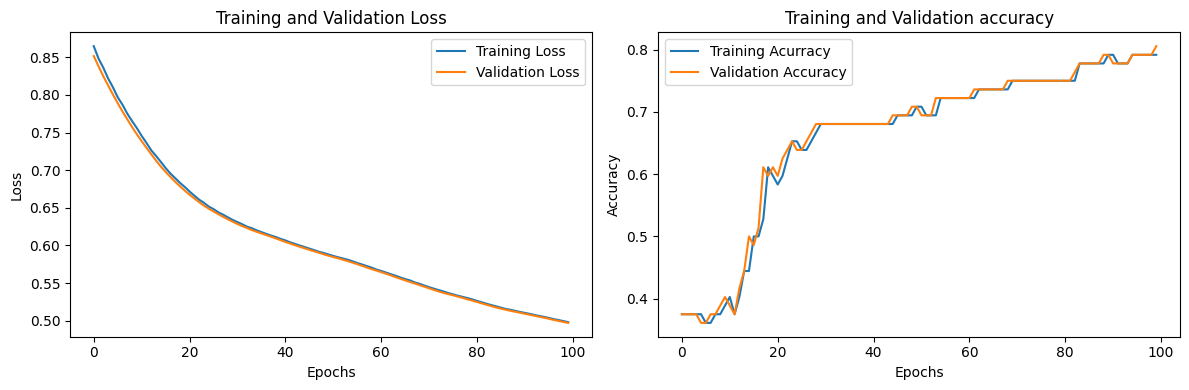

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot precision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Acurracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**❏ Construir e treinar modelos para categorização multi-classe.**

No código abaixo resolverei o problema clássico da MNIST Fashion.

**❏ Utilizar conjuntos de dados da biblioteca tf.data.datasets.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_inputs, train_labels), (test_inputs, test_labels) = fashion_mnist.load_data()

In [ ]:
train_inputs.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
# Os valores de pixel estão entre 0 e 255. Normalizando...
train_inputs= train_inputs / 255.0
test_inputs = test_inputs / 255.0


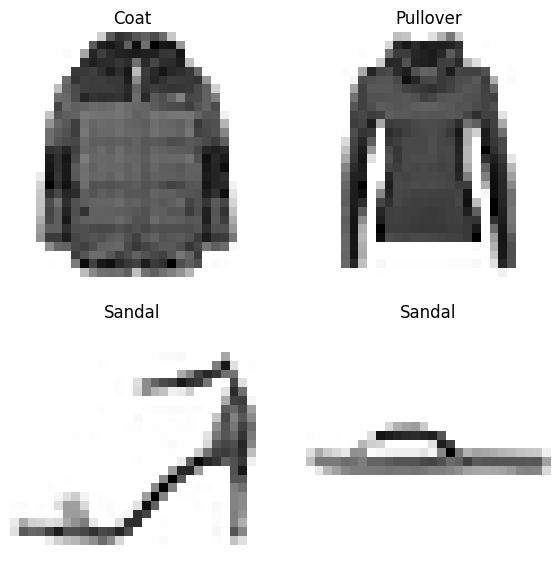

In [ ]:
# Caso queira vizualizar alguns
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_inputs)))
  plt.imshow(train_inputs[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
def novo_model_2( act='relu', opt='Adam'):

    model = tf.keras.Sequential()
    tf.random.set_seed(1)
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # como a imagem é 28 x 28 precisamos usar isso
    model.add(tf.keras.layers.Dense(10, activation=act))
    model.add(tf.keras.layers.Dense(10, activation=act))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))  # output layer

    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model
model_2 = novo_model_2()
history =model_2.fit(train_inputs, train_labels, epochs=5, batch_size=32, validation_data=(test_inputs, test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7334 - accuracy: 0.7319 - val_loss: 0.5218 - val_accuracy: 0.8189
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4649 - accuracy: 0.8403 - val_loss: 0.4774 - val_accuracy: 0.8340
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4365 - accuracy: 0.8470 - val_loss: 0.4612 - val_accuracy: 0.8391
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4235 - accuracy: 0.8515 - val_loss: 0.4577 - val_accuracy: 0.8418
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4122 - accuracy: 0.8565 - val_loss: 0.4431 - val_accuracy: 0.8450


In [ ]:
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 10)                7850      
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


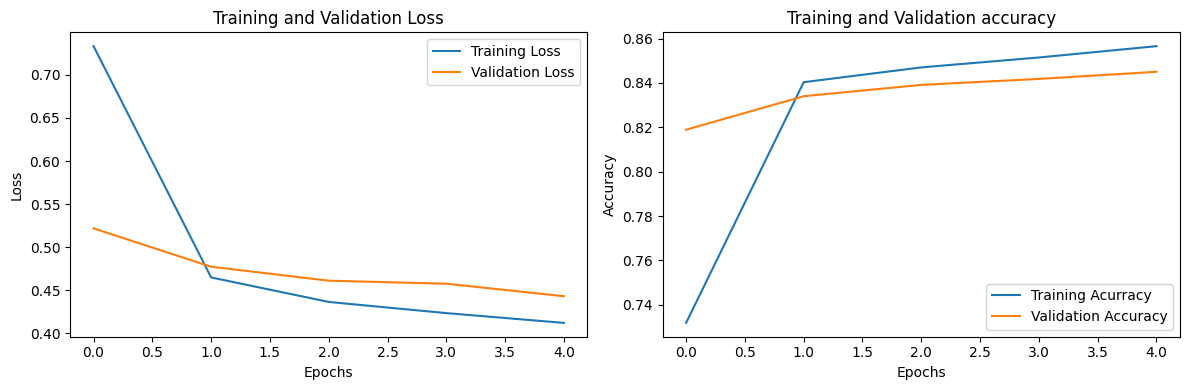

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot precision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Acurracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**❏ Utilizar modelos pré-treinados (transfer learning).**

**❏ Extrair características de modelos pré-treinados.**

In [ ]:
# Tentando melhorar o modelo 2
tl_model=tf.keras.models.clone_model(model_2)
for layer in tl_model.layers:
    layer.trainable = False
tl_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 10)                7850      
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 8070 (31.52 KB)
_________________________________________________________________


In [ ]:
# Adicionando uma camada softmax
tl_model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

tl_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

tl_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 10)                7850      
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 10)                110       
                                                                 
 dense_69 (Dense)            (None, 10)                110       
                                                                 
Total params: 8180 (31.95 KB)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 8070 (31.52 KB)
_________________________________________________________________


In [ ]:
history =tl_model.fit(train_inputs, train_labels, epochs=100, batch_size=32, validation_data=(test_inputs, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2947 - accuracy: 0.1517 - val_loss: 2.2843 - val_accuracy: 0.2362
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2747 - accuracy: 0.2430 - val_loss: 2.2654 - val_accuracy: 0.2475
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2560 - accuracy: 0.2962 - val_loss: 2.2473 - val_accuracy: 0.3084
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2381 - accuracy: 0.3388 - val_loss: 2.2302 - val_accuracy: 0.2860
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2211 - accuracy: 0.3310 - val_loss: 2.2137 - val_accuracy: 0.3323


**❏ Identificar estratégias para prevenir overfitting, incluindo aumento de dados e dropout.**

Aumento de dados será tratado em outro notebook.
Nesse exemplo vou usar o callback de parar cedo e reduzir o learning rate.

**❏ Utilizar callbacks para acionar o fim dos ciclos de treinamento.**

Tensorflow oferece uma série de callbacks úteis. Vou usar a seguir os que achei mais úteis:



1.   Checkpoint - Salva os melhores treinos
2.   Early Stopping - Se não melhorar em x tempo para
3. ReduceLROnPlateu - Reduz o learning rate se não estiver melhorando



In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="weights/checkpoint.ckpt",
                                                         save_weights_only=True, # False salva tudo
                                                         save_best_only=True,
                                                         save_freq="epoch", # Frequência
                                                         verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)
novo_model_1.fit(train_input,
            train_label,
            epochs=1000,
            validation_data=(test_input, test_label),
            callbacks=[checkpoint_callback,
                       early_stopping,
                       reduce_lr])

Epoch 1/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8125
Epoch 1: val_loss improved from inf to 0.41825, saving model to weights/checkpoint.ckpt
3/3 [==============================] - 0s 87ms/step - loss: 0.4187 - accuracy: 0.7917 - val_loss: 0.4183 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4250 - accuracy: 0.8125
Epoch 2: val_loss improved from 0.41825 to 0.41776, saving model to weights/checkpoint.ckpt
3/3 [==============================] - 0s 55ms/step - loss: 0.4183 - accuracy: 0.8056 - val_loss: 0.4178 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3466 - accuracy: 0.8438
Epoch 3: val_loss improved from 0.41776 to 0.41719, saving model to weights/checkpoint.ckpt
3/3 [==============================] - 0s 63ms/step - loss: 0.4180 - accuracy: 0.8056 - val_loss: 0.4172 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 4/1000
1/3 [=====

In [ ]:
pred=np.round(model_1.predict(train_input))

NameError: name 'model_1' is not defined

In [ ]:
certo = np.sum(tf.squeeze(pred) == test_label)

# Calculate the total number of predictions
total = len(pred)

# Calculate Accuracy
accuracy = certo / total

# Print the result
print("Accuracy:", accuracy)

Accuracy: 0.8055555555555556


# Extras úteis

**plot model**

Pode ajudar na vizualização de sua rede neural(eu acho meio ruim).

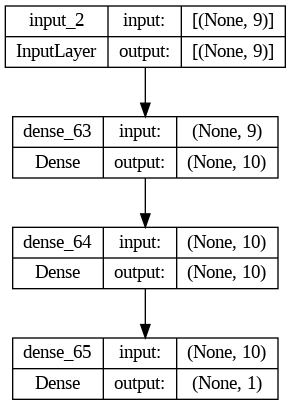

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

**Salvando e carregando o modelo**

Como mostrei na parte 1, para salvar o modelo temos 2 opções

SavedModel

In [ ]:
model_1.save('modelos_salvos/modelo')
novo_modelo = tf.keras.models.load_model('modelos_salvos/modelo')

In [ ]:
novo_modelo.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 10)                100       
                                                                 
 dense_64 (Dense)            (None, 10)                110       
                                                                 
 dense_65 (Dense)            (None, 1)                 11        
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


HDF5

In [ ]:
model_1.save('modelo.h5')
novo_modelo = tf.keras.models.load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
novo_modelo.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 10)                100       
                                                                 
 dense_64 (Dense)            (None, 10)                110       
                                                                 
 dense_65 (Dense)            (None, 1)                 11        
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Grid Search**

A escolha de batch size e epoch que eu fiz foi arbitrária. Pra achar a melhor combinação, GridSearch do sklearn é útil.

In [ ]:
from sklearn.model_selection import GridSearchCV
!pip install scikeras # não tem por padrão
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(build_fn=novo_model_1, verbose=0) # integra com o scikit pra fazer classificação
# Parâmetros
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(train_input, train_label)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=16, epochs=50; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=16, epochs=50; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=16, epochs=50; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=16, epochs=100; total time=   2.6s
[CV] END ..........................batch_size=16, epochs=100; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=16, epochs=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=32, epochs=50; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=32, epochs=50; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=32, epochs=50; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=32, epochs=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=32, epochs=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=32, epochs=100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=64, epochs=50; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=64, epochs=50; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ...........................batch_size=64, epochs=50; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=64, epochs=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=64, epochs=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ..........................batch_size=64, epochs=100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# Resumão
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) com: %r" % (mean, stdev, param))

Melhor: 0.750000 usando {'batch_size': 32, 'epochs': 100}
0.583333 (0.090010) com: {'batch_size': 16, 'epochs': 50}
0.666667 (0.068041) com: {'batch_size': 16, 'epochs': 100}
0.694444 (0.070820) com: {'batch_size': 32, 'epochs': 50}
0.750000 (0.122663) com: {'batch_size': 32, 'epochs': 100}
0.597222 (0.019642) com: {'batch_size': 64, 'epochs': 50}
0.694444 (0.019642) com: {'batch_size': 64, 'epochs': 100}


O Grid search também pode ser usado pra achar o melhor otimizador, melhor número de neurônios etc.

**HParams**

Faz o mesmo que o GridSearch, porém é integrado com o tensorboard.

https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams?hl=pt-br

In [ ]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
# Escolha as variáveis globais abaixo
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def melhor_hiper(hparams):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
  ])
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(train_inputs, train_labels, epochs=1) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(test_inputs, test_labels)
  return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = melhor_hiper(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'adam'}
313/313 [==============================] - 3s 7ms/step - loss: 0.4872 - accuracy: 0.8311
--- Starting trial: run-1
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'sgd'}
313/313 [==============================] - 1s 3ms/step - loss: 0.6521 - accuracy: 0.7755
--- Starting trial: run-2
{'num_units': 16, 'dropout': 0.2, 'optimizer': 'adam'}
313/313 [==============================] - 1s 2ms/step - loss: 0.5187 - accuracy: 0.8129
--- Starting trial: run-3
{'num_units': 16, 'dropout': 0.2, 'optimizer': 'sgd'}
313/313 [==============================] - 1s 2ms/step - loss: 0.6995 - accuracy: 0.7629
--- Starting trial: run-4
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'adam'}
313/313 [==============================] - 2s 5ms/step - loss: 0.4710 - accuracy: 0.8285
--- Starting trial: run-5
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'sgd'}
313/313 [==============================] - 1s 2ms/step - loss: 0.6012 - 

**Tabela bizu hiperparâmetros**

Escolhas comuns de hiperparametros pra problemas de classificação, por Daniel Bourke.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

**Tabela Bizu de avaliação**

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

**Matriz de confusão**

Ferramenta útil para entender onde sua rede neural está errando.


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_1.predict(test_input)
confusion_matrix(test_label, tf.round(y_preds)) # tem que arredondar pois a saída é estocástica

In [ ]:
y_preds = model_2.predict(test_inputs)
confusion_matrix(test_labels, np.argmax(y_preds, axis=1))